### Creating a markdown to give basic information about Internship Task – Data Analysis Project

**Objective:**
- Analyze unemployment rate data
- Study trends and patterns
- Understand the impact of Covid-19
- Provide insights useful for economic and social policies

**Tools Used:**
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8')

**1) Loading the Dataset and viewing 1st five rows.**

In [2]:
df = pd.read_csv("Unemployment in India.csv")

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**2) Checking the Dataset Size & Columns**

In [3]:
df.shape

(768, 7)

In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

**3) Data Cleaning : I feel this is one of the most vital process**

**What I have noticed -**
- Column ' Date' has a leading space
- Column names are long & messy
- Date is not yet in datetime format
- Possible missing values

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

In [7]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation_Rate', 'Area'],
      dtype='object')

**4) Conversion of Date Column to Date Format**

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\shrir\AppData\Local\Temp\ipykernel_19452\2394721818.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [10]:
df.dtypes

Region                               object
Date                         datetime64[ns]
Frequency                            object
Unemployment_Rate                   float64
Employed                            float64
Labour_Participation_Rate           float64
Area                                 object
dtype: object

**5) Missing Values & Data Validation**

In [11]:
df.isnull().sum()

Region                       28
Date                         28
Frequency                    28
Unemployment_Rate            28
Employed                     28
Labour_Participation_Rate    28
Area                         28
dtype: int64

In [12]:
# Drop rows with missing values
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Region                       0
Date                         0
Frequency                    0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Area                         0
dtype: int64

In [14]:
df.shape

(740, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Region                     740 non-null    object        
 1   Date                       740 non-null    datetime64[ns]
 2   Frequency                  740 non-null    object        
 3   Unemployment_Rate          740 non-null    float64       
 4   Employed                   740 non-null    float64       
 5   Labour_Participation_Rate  740 non-null    float64       
 6   Area                       740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [16]:
df.describe()

,Date,Unemployment_Rate,Employed,Labour_Participation_Rate
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


**6) Exploratory Data Analysis (EDA)**

In [17]:
df['Unemployment_Rate'].describe()

count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Unemployment_Rate, dtype: float64

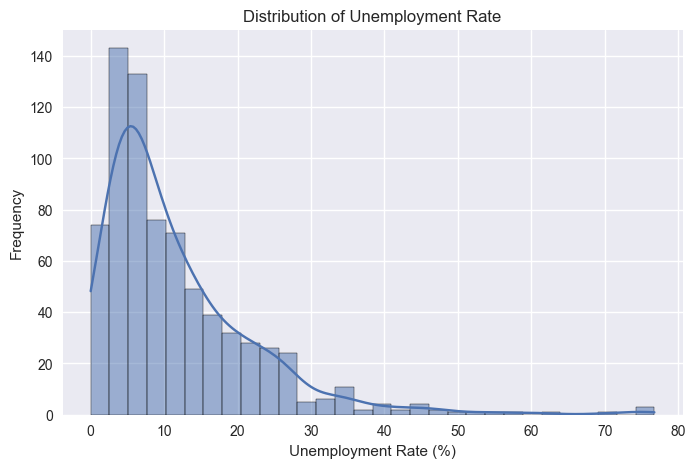

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Unemployment_Rate'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

Hence, graph is right-skewed

**Average Unemployment by Area below**

In [19]:
area_unemployment = df.groupby('Area')['Unemployment_Rate'].mean()
area_unemployment

Area
Rural    10.324791
Urban    13.166614
Name: Unemployment_Rate, dtype: float64

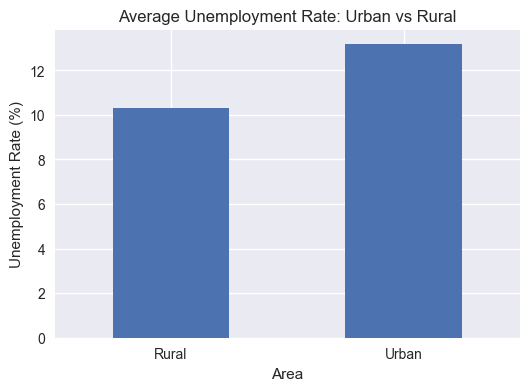

In [20]:
plt.figure(figsize=(6,4))
area_unemployment.plot(kind='bar')
plt.title('Average Unemployment Rate: Urban vs Rural')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.show()

**Average Unemployment by Region below**

In [21]:
region_unemployment = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)
region_unemployment

Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name: Unemployment_Rate, dtype: float64

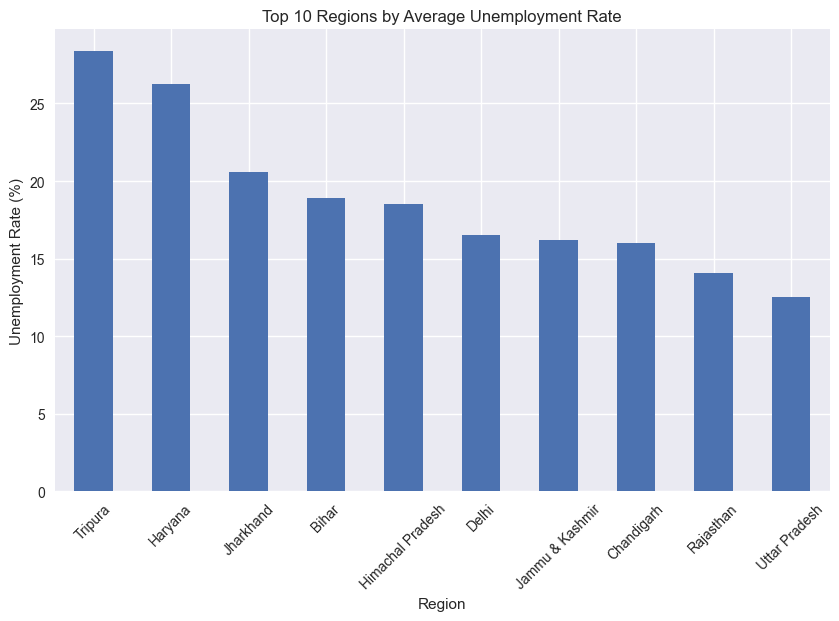

In [22]:
plt.figure(figsize=(10,6))
region_unemployment.head(10).plot(kind='bar')
plt.title('Top 10 Regions by Average Unemployment Rate')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

**7) COVID-19 IMPACT ANALYSIS**

In [23]:
df['Covid_Period'] = np.where(df['Date'] < '2020-03-01', 'Pre-Covid', 'Covid')

Covid period column created from the above code

In [24]:
covid_impact = df.groupby('Covid_Period')['Unemployment_Rate'].mean()
covid_impact

Covid_Period
Covid        17.774363
Pre-Covid     9.509534
Name: Unemployment_Rate, dtype: float64

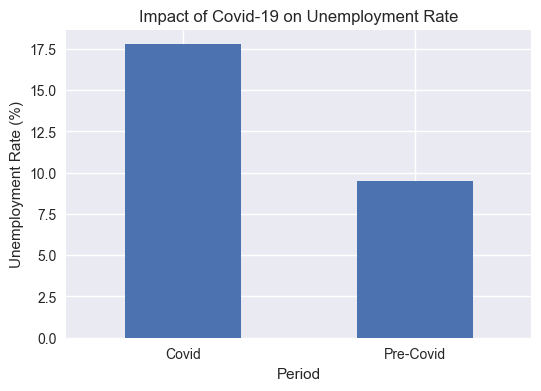

In [25]:
plt.figure(figsize=(6,4))
covid_impact.plot(kind='bar')
plt.title('Impact of Covid-19 on Unemployment Rate')
plt.xlabel('Period')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.show()

**8) Trend and Time Analysis**

In [26]:
monthly_trend = df.groupby('Date')['Unemployment_Rate'].mean()
monthly_trend.head()

Date
2019-05-31    8.874259
2019-06-30    9.303333
2019-07-31    9.033889
2019-08-31    9.637925
2019-09-30    9.051731
Name: Unemployment_Rate, dtype: float64

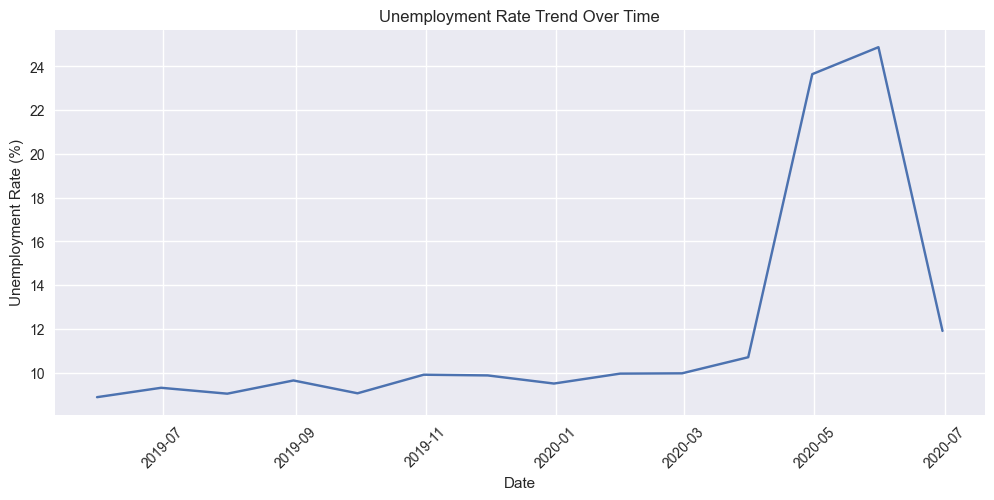

In [27]:
plt.figure(figsize=(12,5))
plt.plot(monthly_trend.index, monthly_trend.values)
plt.title('Unemployment Rate Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

Now lets move on to Urban vs Rural trend during covid

In [28]:
area_trend = df.groupby(['Date', 'Area'])['Unemployment_Rate'].mean().unstack()
area_trend.head()

Area,Rural,Urban
Date,,
2019-05-31,7.068077,10.551429
2019-06-30,8.201154,10.326786
2019-07-31,7.741923,10.233571
2019-08-31,8.503077,10.730741
2019-09-30,7.036800,10.917407


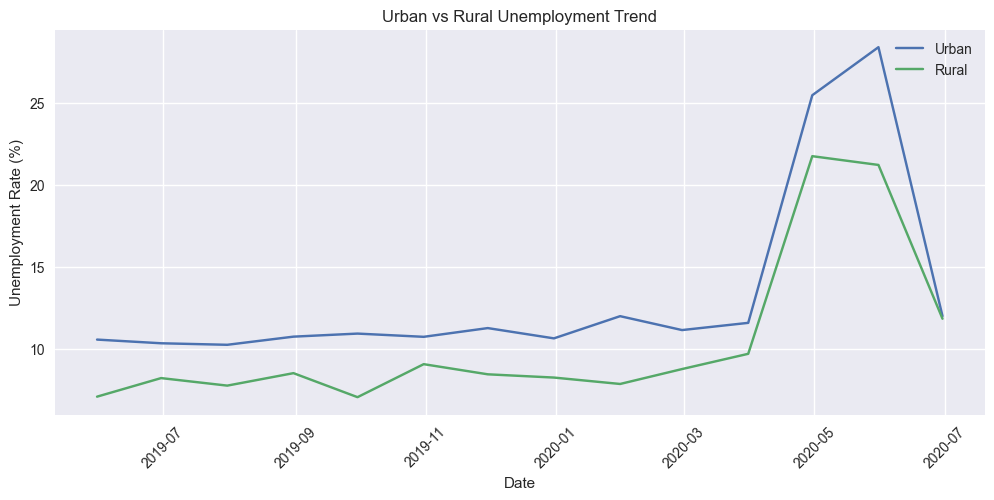

In [29]:
plt.figure(figsize=(12,5))
plt.plot(area_trend.index, area_trend['Urban'], label='Urban')
plt.plot(area_trend.index, area_trend['Rural'], label='Rural')
plt.title('Urban vs Rural Unemployment Trend')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

THANK YOU